# INTRODUCCIÓN RETO 2

In [13]:
# Algunas bibliotecas necesarias
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

In [14]:
# Para los primeros ejercicios vamos a crear 4 grupos de datos en 2 dimensiones.

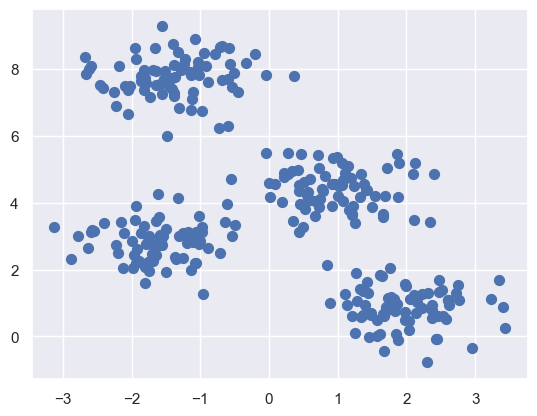

In [15]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [133]:
# Creamos una lista de la etiqueta del grupo al que pertenecen los datos


In [134]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[1 2 0 2 1 1 3 0 2 2 3 2 0 2 1 0 0 1 3 3 1 1 0 3 3 0 1 0 3 0 2 2 0 2 2 2 2
 2 3 1 0 3 0 0 3 3 2 3 2 1 3 1 2 1 1 3 2 3 2 1 2 0 2 3 3 3 2 1 2 3 0 3 2 3
 3 2 3 0 1 2 1 0 1 1 2 0 1 0 2 2 0 1 2 3 3 0 1 1 0 3 2 1 2 1 0 1 1 0 2 0 3
 3 1 2 1 0 2 1 1 0 3 1 3 1 1 1 1 3 1 3 2 3 3 1 2 3 3 2 0 2 2 3 0 3 0 3 2 0
 2 2 2 0 2 0 1 3 2 3 1 0 2 0 0 1 0 3 3 0 1 0 0 2 1 0 3 2 1 1 0 3 1 0 3 3 0
 0 0 0 1 2 0 3 0 0 3 3 3 0 3 2 0 3 1 3 0 2 3 2 0 2 0 3 0 0 2 3 3 1 1 0 2 1
 1 3 1 3 0 2 2 0 0 2 0 1 3 0 1 3 2 3 1 0 1 2 2 2 2 3 3 2 0 3 1 0 3 3 3 1 1
 2 0 0 3 1 2 3 0 2 0 1 1 3 3 0 1 1 1 0 2 2 1 1 0 1 1 1 2 3 2 0 1 1 2 2 2 1
 1 0 2 3]


C:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
# Coloreamos los datos con esas etiquetas
# Creamos los centroides. Grafiquémoslos igualmente

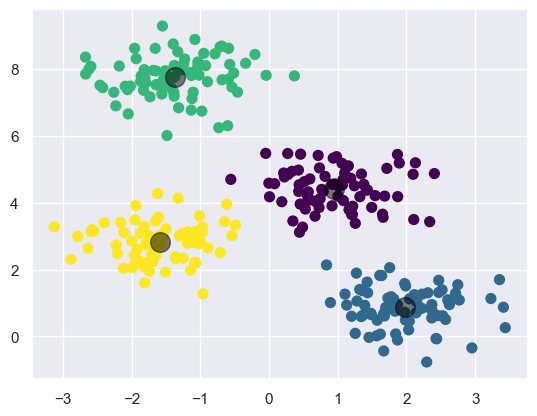

In [136]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [137]:
# Para encontrar los grupos, sklearn utiliza un algoritmo llamado Expectation maximization (E-M)
# Inventa aleatoriamente los centroides
# Repite los siguientes pasos hasta hallar la convergencia:
# Paso-E: Asigna cada uno de los ejemplos al centroide mas cercano formando un grupo para cada centroide
# Paso-M: Re calcula los centroides como el promedio de los puntos asignados a su grupo

# A) RETO 1

# Creando de manera manual una función "mi_algoritmo_kmeans" :
Anteriormente usamos la bilbioteca sklearn para hacer los clusters de la variable  X  pero para este reto no utilizaremos ninguna implementación previa de k-means.

Escribe tu propio código para crear una función "mi_algoritmo_kmeans" que tenga los siguientes parámetros:
X: variable multidimensional
n_clusters: número de clusters a crear
semilla: semilla que servirá para replicar la inicialización aleatoria
La función debe devolver los siguientes datos:
centroides: un arreglo con las coordenadas de los centroides
etiquetas: un arreglo con las etiquetas de los grupos (clusters)


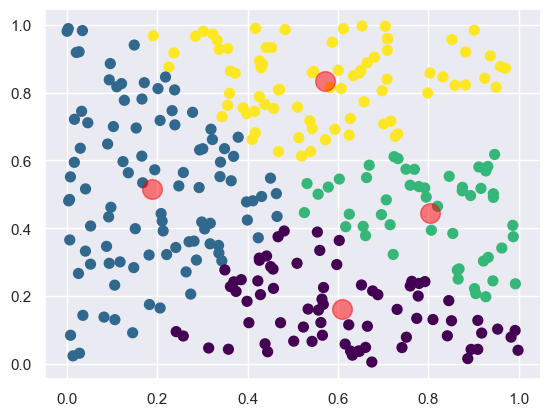

In [150]:
import numpy as np
import matplotlib.pyplot as plt

def mi_algoritmo_kmeans(X, n_clusters, semilla):
    np.random.seed(semilla)
    n_samples, n_features = X.shape
    centroides = np.random.rand(n_clusters, n_features)
    antiguos_centroides = np.zeros(centroides.shape)
    etiquetas = np.zeros(n_samples)
    error = np.linalg.norm(centroides - antiguos_centroides)
    while error != 0:
        for i in range(n_samples):
            distancias = np.linalg.norm(X[i] - centroides, axis=1)
            etiquetas[i] = np.argmin(distancias)
        antiguos_centroides = centroides.copy()
        for i in range(n_clusters):
            puntos = [X[j] for j in range(n_samples) if etiquetas[j] == i]
            centroides[i] = np.mean(puntos, axis=0)
        error = np.linalg.norm(centroides - antiguos_centroides)
    return centroides, etiquetas

X = np.random.rand(300, 2)
centroides, etiquetas = mi_algoritmo_kmeans(X, 4, 123)

plt.scatter(X[:, 0], X[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [ ]:
# SEGUNDO MÉTODO SIN USAR SKLEARN

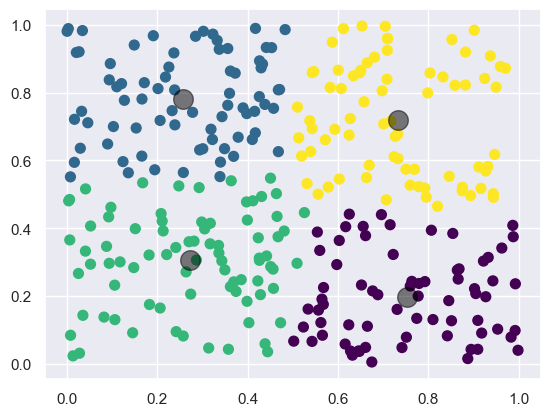

In [151]:

def mi_algoritmo_kmeans2(X1, n_clusters, semilla):
    np.random.seed(semilla)
    
    # Inicializa los centroides aleatoriamente
    centroides = X1[np.random.choice(X1.shape[0], n_clusters, replace=False), :]
    
    # Calcula la distancia euclidiana entre los puntos y los centroides
    def distancia_euclidiana(a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    # Repite hasta que los centroides no cambien
    etiquetas_previas = np.zeros(X1.shape[0])
    while True:
        # Asigna cada punto al centroide más cercano
        etiquetas = np.array([np.argmin([distancia_euclidiana(x, centroides[i]) for i in range(n_clusters)]) for x in X1])
        
        # Si no hubo cambios en las etiquetas, termina
        if np.array_equal(etiquetas, etiquetas_previas):
            break
        
        # Actualiza las etiquetas previas
        etiquetas_previas = np.copy(etiquetas)
        
        # Recalcula los centroides como la media de los puntos en cada cluster
        for i in range(n_clusters):
            centroides[i] = np.mean(X1[etiquetas == i], axis=0)
    
    return centroides, etiquetas

# Crea una variable multidimensional con datos aleatorios
X1 = np.random.rand(300, 2)

# Ejecuta la función "mi_algoritmo_kmeans2" con 4 clusters y semilla 123
centroides, etiquetas = mi_algoritmo_kmeans2(X1, 4, 123)

# Graficando resultados
plt.scatter(X1[:, 0], X1[:, 1], c=etiquetas, s=50, cmap='viridis')

#centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);


# B) RETO 2
Repite el ejercicio anterior (utilizando tu función) pero esta vez indica al algorímto que cree 3 clusters en vez de 4. Comparte tus conclusiones.

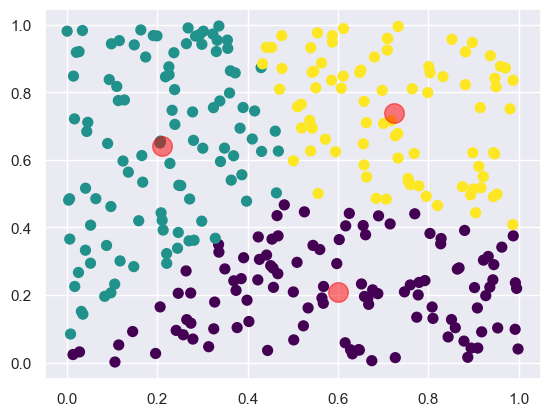

In [152]:
def mi_algoritmo_kmeans(X, n_clusters, semilla):
    np.random.seed(semilla)
    n_samples, n_features = X.shape
    centroides = np.random.rand(n_clusters, n_features)
    antiguos_centroides = np.zeros(centroides.shape)
    etiquetas = np.zeros(n_samples)
    error = np.linalg.norm(centroides - antiguos_centroides)
    while error != 0:
        for i in range(n_samples):
            distancias = np.linalg.norm(X[i] - centroides, axis=1)
            etiquetas[i] = np.argmin(distancias)
        antiguos_centroides = centroides.copy()
        for i in range(n_clusters):
            puntos = [X[j] for j in range(n_samples) if etiquetas[j] == i]
            centroides[i] = np.mean(puntos, axis=0)
        error = np.linalg.norm(centroides - antiguos_centroides)
    return centroides, etiquetas

X = np.random.rand(300, 2)
centroides, etiquetas = mi_algoritmo_kmeans(X, 3, 123)

plt.scatter(X[:, 0], X[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)
plt.show()

### CONCLUSIONES DEL RETO2.- Al cambiar a 3 clusters, se modifican los centroides y la distancia entre puntos por grupos crece, por tanto es necesario iterar hasta encontrar la cantidad de clusters optimo; donde la distancia entre el centro y puntos sea mínimo. Para tal efecto se puede usar el método del codo.


# Reto 3:
La variable X que creamos tiene 2 dimensiones
Vamos a tomar una de estas dimensiones y multiplicarla por el escalar  e=100  y visualicemos nuestro nuevo dataset  X _ reescala

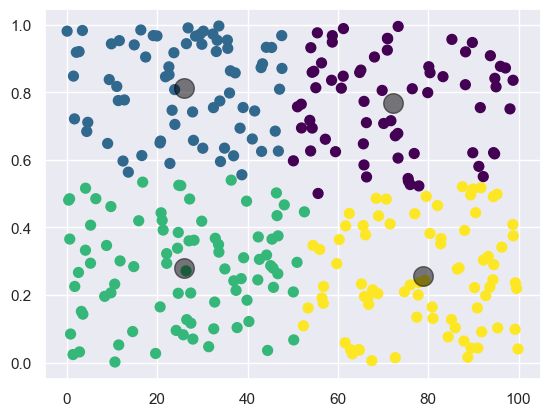

In [19]:
def mi_algoritmo_kmeans2(X1, n_clusters, semilla):
    np.random.seed(semilla)
    
    # Inicializa los centroides aleatoriamente
    centroides = X1[np.random.choice(X1.shape[0], n_clusters, replace=False), :]
    
    # Calcula la distancia euclidiana entre los puntos y los centroides
    def distancia_euclidiana(a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    # Repite hasta que los centroides no cambien
    etiquetas_previas = np.zeros(X1.shape[0])
    while True:
        # Asigna cada punto al centroide más cercano
        etiquetas = np.array([np.argmin([distancia_euclidiana(x, centroides[i]) for i in range(n_clusters)]) for x in X1])
        
        # Si no hubo cambios en las etiquetas, termina
        if np.array_equal(etiquetas, etiquetas_previas):
            break
        
        # Actualiza las etiquetas previas
        etiquetas_previas = np.copy(etiquetas)
        
        # Recalcula los centroides como la media de los puntos en cada cluster
        for i in range(n_clusters):
            centroides[i] = np.mean(X1[etiquetas == i], axis=0)
    
    return centroides, etiquetas

# Crea una variable multidimensional con datos aleatorios
X1 = np.random.rand(300, 2)
# Multiplicando por escalar e=100
e = 100
X_reescala = np.stack((e*X1[:, 0], X1[:, 1]), axis=1)

# Ejecuta la función "mi_algoritmo_kmeans2" con 4 clusters y semilla 123
centroides, etiquetas = mi_algoritmo_kmeans2(X1, 4, 123)

# Graficando resultados
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(e*centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# Ahora aplica el alogrítmo de k-medias para crear 4 grupos pero esta vez sobre las variables  X _ reescala  y escribe tus conclusiones sobre los resultados

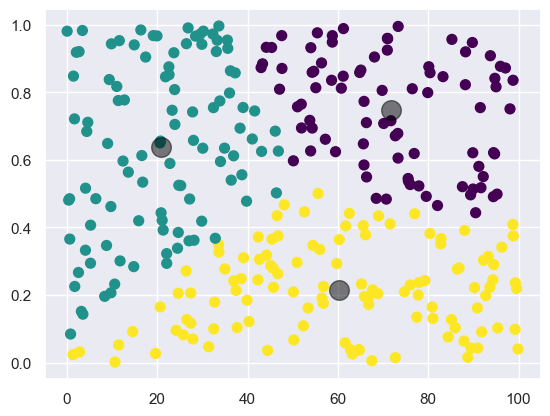

In [20]:
def mi_algoritmo_kmeans2(X1, n_clusters, semilla):
    np.random.seed(semilla)
    
    # Inicializa los centroides aleatoriamente
    centroides = X1[np.random.choice(X1.shape[0], n_clusters, replace=False), :]
    
    # Calcula la distancia euclidiana entre los puntos y los centroides
    def distancia_euclidiana(a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    # Repite hasta que los centroides no cambien
    etiquetas_previas = np.zeros(X1.shape[0])
    while True:
        # Asigna cada punto al centroide más cercano
        etiquetas = np.array([np.argmin([distancia_euclidiana(x, centroides[i]) for i in range(n_clusters)]) for x in X1])
        
        # Si no hubo cambios en las etiquetas, termina
        if np.array_equal(etiquetas, etiquetas_previas):
            break
        
        # Actualiza las etiquetas previas
        etiquetas_previas = np.copy(etiquetas)
        
        # Recalcula los centroides como la media de los puntos en cada cluster
        for i in range(n_clusters):
            centroides[i] = np.mean(X1[etiquetas == i], axis=0)
    
    return centroides, etiquetas

# Crea una variable multidimensional con datos aleatorios
X1 = np.random.rand(300, 2)
# Multiplicando por escalar e=100
e = 100
X_reescala = np.stack((e*X1[:, 0], X1[:, 1]), axis=1)

# Ejecuta la función "mi_algoritmo_kmeans2" con 3 clusters y semilla 123
centroides, etiquetas = mi_algoritmo_kmeans2(X1, 3, 123)

# Graficando resultados
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(e*centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);

### CONCLUSIONES DEL RETO3.- Los resultados son similareas al reto2, pero con una mejor visualización de la escala, igualmente al cambiar a 3 clusters, se modifican los centroides y la distancia entre los puntos por cluster es mayor, por tanto es necesario iterar hasta encontrar la cantidad de clusters optimo; en donde la distancia entre el centro y puntos sea mínimo. Para tal efecto se puede usar el método del codo.¶

# Reto 4 (opcional):
Los colores en computación suelen ser representados como una combinación de números asociados a los colores red, green, blue

veamos un ejemplo

In [21]:
#!pip install sty
from sty import fg, bg, ef, rs
from sty import Style, RgbFg

rmax = 255
gmax = 255
bmax = 255
salto = 50

for r in range(0,rmax,salto):
  for g in range(0,gmax,salto):
    for b in range(0,bmax,salto):
      fg.color = Style(RgbFg(r, g, b))
      texto = fg.color + chr(9608)*3 + ' r=' + str(r) + ', g=' + str(g) + ', b=' + str(b)
      print(texto)

███ r=0, g=0, b=0
███ r=0, g=0, b=50
███ r=0, g=0, b=100
███ r=0, g=0, b=150
███ r=0, g=0, b=200
███ r=0, g=0, b=250
███ r=0, g=50, b=0
███ r=0, g=50, b=50
███ r=0, g=50, b=100
███ r=0, g=50, b=150
███ r=0, g=50, b=200
███ r=0, g=50, b=250
███ r=0, g=100, b=0
███ r=0, g=100, b=50
███ r=0, g=100, b=100
███ r=0, g=100, b=150
███ r=0, g=100, b=200
███ r=0, g=100, b=250
███ r=0, g=150, b=0
███ r=0, g=150, b=50
███ r=0, g=150, b=100
███ r=0, g=150, b=150
███ r=0, g=150, b=200
███ r=0, g=150, b=250
███ r=0, g=200, b=0
███ r=0, g=200, b=50
███ r=0, g=200, b=100
███ r=0, g=200, b=150
███ r=0, g=200, b=200
███ r=0, g=200, b=250
███ r=0, g=250, b=0
███ r=0, g=250, b=50
███ r=0, g=250, b=100
███ r=0, g=250, b=150
███ r=0, g=250, b=200
███ r=0, g=250, b=250
███ r=50, g=0, b=0
███ r=50, g=0, b=50
███ r=50, g=0, b=100
███ r=50, g=0, b=150
███ r=50, g=0, b=200
███ r=50, g=0, b=250
███ r=50, g=50, b=0
███ r=50, g=50, b=50
███ r=50, g=50, b=100
███ r=50, g=50, b=150
███ r=50, g=50, b=200
███ r=50, g=50

In [23]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image

# Carga de la imagen
im = Image.open("image.jpg")

# Convertir a array numpy y normalizar
im_np = np.array(im).reshape(-1, 3) / 255.0

# Crear un modelo KMeans con 16 clusters
kmeans = KMeans(n_clusters=16)

# Entrenamiento con los datos de la imagen
kmeans.fit(im_np)

# Obtener los centroides de los 16 clusters
centers = kmeans.cluster_centers_

# Imprimir los 16 colores resultantes
for color in centers:
    print(tuple(color * 255))

# Recrea la imagen utilizando los 16 colores resultantes
im_compressed = kmeans.predict(im_np)
im_compressed = centers[im_compressed] * 255
im_compressed = np.clip(im_compressed, 0, 255).astype(np.uint8)
im_compressed = Image.fromarray(im_compressed.reshape(*im.size, 3))
im_compressed.save("image_compressed.jpg")

C:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(7.693595667515559, 52.909739818810074, 104.28985939285687)
(70.28434644418003, 138.02967818832593, 171.87997616209154)
(26.09327877546167, 98.02191407138001, 22.665469424866302)
(2.9275559304593695, 3.629478832295693, 5.206743809227771)
(141.701058522945, 174.02389585108838, 191.59119114249415)
(102.97903399836973, 210.72682844264688, 252.4709416717253)
(51.777633679168794, 107.02913008778826, 97.13379555732863)
(100.12723672739436, 130.5281557988703, 27.314538173982612)
(210.10766621247657, 220.59652976668426, 211.2285682507132)
(53.05248488035786, 48.02448943814235, 31.03318432815986)
(3.4686891654136245, 13.871688651484012, 61.824453754057814)
(26.404883839233293, 200.41058165169093, 251.67803968120123)
(130.71440848743552, 69.77566382171591, 58.70468824087235)
(14.324080281853016, 99.72882758227098, 162.01290957591266)
(187.52854353511455, 177.2820266737317, 94.0289903034716)
(113.52781641168812, 140.28449235047523, 109.8850486787189)


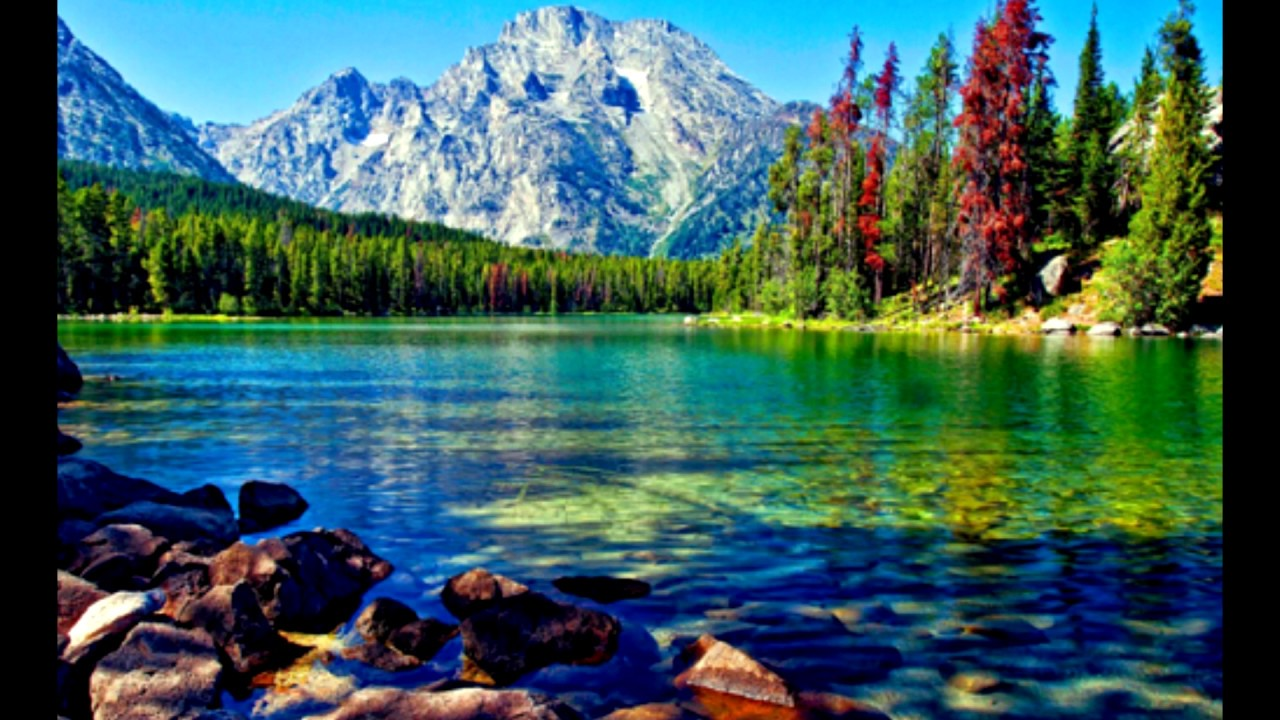

In [25]:
# IMAGEN ORIGINAL
from IPython.display import display, Image
display(Image(filename='image.jpg'))


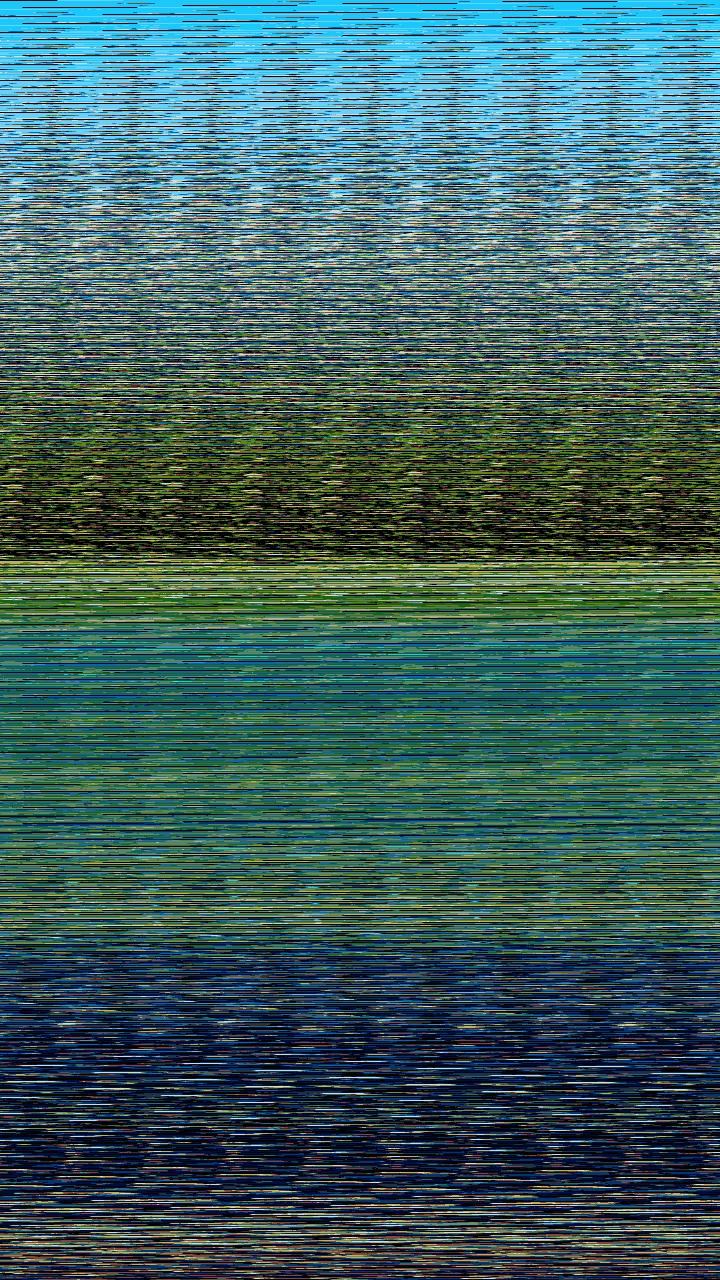

In [26]:
# IMAGEN UTILIZANDO LOS 16 COLORES RESULTANTES
from IPython.display import display, Image
display(Image(filename='image_compressed.jpg'))
